# Trabajo Fin de Máster
# Documento *(código) 2 de 2

Propuesta 117. Proyectos tecnológicos mediante metodología ágil. Gestión de riesgos y complejidad. Caso República Dominicana.

Descripción de la propuesta: Algunos proyectos tecnológicos como los de investigación multidisciplinar, sistemas de información o inteligencia artificial requieren la aplicación de una metodología ágil para su gestión. Sin embargo, uno de los mayores problemas es la realización de la gestión de riesgos y su relación con la complejidad. Se deben estudiar alternativas para evitar el posible fracaso del proyecto. Una de las alternativas es la utilización de la evolución probabilística de riesgos mediante inferencia bayesiana.

**Autor:** Leandro Leonardo

**Fecha de elaboración:** 01/01/2025

**Programa:** Lógica, Computación e IA



---



In [1]:
!python --version
# Debería mostrar: Python 3.10.11
!pip --version

print("Bloque ejecutado correctamente, puede continuar.")

Python 3.10.11
pip 25.0.1 from C:\Users\User\Desktop\TFM_Leandro_Leonardo_Dominican_Republic\.venv\lib\site-packages\pip (python 3.10)

Bloque ejecutado correctamente, puede continuar.




---



# CONTRUYENDO RED BAYESIANA CON RANDOM FOREST
UTILIZANDO <<< APRENDIZAJE SUPERVISADO y DATOS ETIQUETADOS  >>> PARA ENTRENAR RED BAYESIANA

Iniciamos con Random Forest y después pasaremos a crear la Red Bayesiana

---

In [2]:
# =========================================
# BLOQUE 0: Comprobación de recursos y timer
# =========================================

import sys
import platform
import os
import time
import psutil
import shutil
import multiprocessing

try:
    import torch
    has_torch = True
except ImportError:
    has_torch = False

# — Parámetros mínimos recomendados —
MIN_PYTHON    = (3, 10)    # Versión mínima de Python
MIN_MEM_GB    = 17         # RAM libre mínima en GB
MIN_DISK_GB   = 20        # Espacio libre en disco mínimo en GB

print("=== RECURSOS DEL ENTORNO ===")
# Python
pv = platform.python_version_tuple()
print(f"- Python {platform.python_version()} ", end="")
if tuple(map(int, pv[:2])) < MIN_PYTHON:
    print(f"(¡Se recomienda >= {MIN_PYTHON}!)")
else:
    print("✓")

# CPU
cores = multiprocessing.cpu_count()
print(f"- Núcleos de CPU disponibles: {cores}")

# RAM
vm = psutil.virtual_memory()
free_mem = vm.available / 1024**3
print(f"- RAM libre: {free_mem:.1f} GB", end="")
if free_mem < MIN_MEM_GB:
    print(f"  (¡Se recomienda ≥ {MIN_MEM_GB} GB!)")
else:
    print(" ✓")

# Disco
du = shutil.disk_usage(os.getcwd())
free_disk = du.free / 1024**3
print(f"- Espacio libre en disco: {free_disk:.1f} GB", end="")
if free_disk < MIN_DISK_GB:
    print(f"  (¡Se recomienda ≥ {MIN_DISK_GB} GB!)")
else:
    print(" ✓")

# GPU (opcional)
if has_torch and torch.cuda.is_available():
    name = torch.cuda.get_device_name(0)
    total = torch.cuda.get_device_properties(0).total_memory / 1024**3
    print(f"- GPU disponible: {name} ({total:.1f} GB)")
else:
    print("- GPU no detectada o no hay torch instalado")

# Inicia el cronómetro
_start_time = time.time()

print("=============================\n")


=== RECURSOS DEL ENTORNO ===
- Python 3.10.11 ✓
- Núcleos de CPU disponibles: 24
- RAM libre: 23.7 GB ✓
- Espacio libre en disco: 861.6 GB ✓
- GPU no detectada o no hay torch instalado





---



In [3]:
# =============================================================================
# INSTALACIÓN DE LIBRERÍAS (EJECUTAR SOLO SI ES NECESARIO)
# =============================================================================
# !pip install scikit-learn pandas matplotlib seaborn numpy ipywidgets requests
!pip install numpy==1.24.3 pandas==2.2.2 scikit-learn==1.6.1 seaborn==0.13.2 matplotlib==3.10.0 ipywidgets==7.7.1 requests==2.32.3 pgmpy==1.0.0 networkx==2.8.8 unidecode==1.3.6 tqdm==4.65.0 --quiet

print("Bloque ejecutado correctamente, puede continuar.")

Bloque ejecutado correctamente, puede continuar.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np, pandas as pd, sklearn, seaborn as sns, matplotlib, pgmpy, networkx as nx

print("numpy   :", np.__version__)
print("pandas  :", pd.__version__)
print("sklearn :", sklearn.__version__)
print("seaborn :", sns.__version__)
print("matplotlib:", matplotlib.__version__)
print("pgmpy   :", pgmpy.__version__)
print("networkx:", nx.__version__)

print("Bloque ejecutado correctamente, puede continuar.")
# Deben de aparecer las siguientes versiones:
# numpy   : 1.24.3
# pandas  : 2.2.2
# sklearn : 1.6.1
# seaborn : 0.13.2
# matplotlib: 3.10.0
# pgmpy   : 1.0.0
# networkx: 2.8.8
# Sin estas versiones, no aseguro una buena ejecucion de los pasos.

numpy   : 1.24.3
pandas  : 2.2.2
sklearn : 1.6.1
seaborn : 0.13.2
matplotlib: 3.10.0
pgmpy   : 1.0.0
networkx: 2.8.8
Bloque ejecutado correctamente, puede continuar.


In [5]:
# =========================================
# BLOQUE 0: configuración de logging, Suprimir INFO/WARNING
# =========================================

import logging

logging.getLogger("numpy").setLevel(logging.ERROR)
logging.getLogger("pandas").setLevel(logging.WARNING)
logging.getLogger("matplotlib").setLevel(logging.ERROR)
logging.getLogger("seaborn").setLevel(logging.ERROR)
logging.getLogger("ipywidgets").setLevel(logging.ERROR)
logging.getLogger("requests").setLevel(logging.ERROR)
logging.getLogger("networkx").setLevel(logging.ERROR)
logging.getLogger("sklearn").setLevel(logging.ERROR)

# =============================================================================
# IMPORTACIÓN DE LIBRERÍAS
# =============================================================================
import numpy as np                     # Operaciones numéricas y generación de datos
import pandas as pd                    # Manipulación de datos en DataFrames
import matplotlib.pyplot as plt        # Creación de gráficos
import seaborn as sns                  # Gráficos estadísticos y mapas de calor
import ipywidgets as widgets           # Para crear widgets interactivos
from ipywidgets import VBox            # Para organizar widgets en un contenedor vertical
from IPython.display import display, clear_output  # Para mostrar y actualizar salidas en Jupyter
import requests                        # Para obtener datos de una API (por ejemplo, tasas de cambio)

# Funciones de scikit-learn para modelado
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Bloque ejecutado correctamente, puede continuar.")

Bloque ejecutado correctamente, puede continuar.


In [6]:
# =============================================================================
# BLOQUE 1: CONFIGURACIÓN GLOBAL
# =============================================================================

# Aquí se definen variables globales para textos fijos y opciones que se usarán en el código.
# De esta forma, cualquier cambio en estos textos se realiza en un solo lugar.

NUMERO_DE_PROYECTOS = 200_000  # Número total de proyectos a simular
RANDOM_SEED = 42      # Semilla para reproducibilidad

# Orden lógico de las fases del proyecto.
PHASE_ORDER = ["Inicio", "Planificación", "Ejecución", "Monitoreo y Control", "Cierre"]

# Opciones para cada dimensión VUCA y su mapeo a valores numéricos.
VUCA_OPTIONS = ["Baja", "Media", "Alta", "Crítica"]
VUCA_MAPPING = {"Baja": 0.2, "Media": 0.5, "Alta": 0.8, "Crítica": 1.0}

# Diccionario de etiquetas para la interfaz (descripciones ampliadas).
LABELS = {
    "fase": "Pregunta: Seleccione la fase del proyecto.\nDescripción: Indique en qué etapa se encuentra el proyecto (Inicio, Planificación, Ejecución, Monitoreo y Control o Cierre).",
    "complejidad": "Pregunta: ¿Cuál es la COMPLEJIDAD del proyecto?\nDescripción: Evalúe la complejidad general del proyecto, de 1 (muy baja) a 5 (muy alta).",
    "presupuesto": "Pregunta: ¿Cuál es el PRESUPUESTO asignado al proyecto en USD?\nDescripción: Ingrese el presupuesto total disponible. Ingrese 0 si no hay presupuesto asignado.",
    "duracion": "Pregunta: ¿Cuál es la DURACIÓN del proyecto en meses?\nDescripción: Indique la duración estimada en meses (0 si es menor a 1 mes).",
    "tiempo": "Pregunta: Indique el valor para 'TIEMPO' en el Triángulo de Hierro.\nDescripción: Este valor (1-10) refleja la importancia del tiempo en el proyecto.",
    "costo": "Pregunta: Indique el valor para 'COSTO' en el Triángulo de Hierro.\nDescripción: Este valor (1-10) refleja la importancia del costo en el proyecto.",
    "calidad": "Pregunta: Indique el valor para 'CALIDAD' en el Triángulo de Hierro.\nDescripción: Evalúe la importancia de la calidad, en una escala de 1 a 10.",
    "num_personas": "Pregunta: ¿Cuántas PERSONAS participan en el proyecto?\nDescripción: Indique el número total de empleados involucrados.",
    "innovacion": "Pregunta: ¿Cuál es el nivel de INNOVACIÓN del proyecto?\nDescripción: Evalúe el grado de innovación, en una escala de 1 a 10.",
    "adaptabilidad": "Pregunta: ¿Cuál es el nivel de ADAPTABILIDAD del proyecto?\nDescripción: Indique qué tan adaptable es el proyecto a cambios, de 1 a 10.",
    "impacto": "Pregunta: ¿Cuál es el IMPACTO del proyecto en la organización?\nDescripción: Evalúe el impacto potencial, en una escala de 1 a 10.",
    "volatilidad": "Pregunta: ¿Cuál es el nivel de VOLATILIDAD del proyecto?\nDescripción: Indique la variabilidad del entorno, Opciones: Baja, Media, Alta, Crítica.",
    "incertidumbre": "Pregunta: ¿Cuál es el nivel de INCERTIDUMBRE del proyecto?\nDescripción: Evalúe la incertidumbre en la información, Opciones: Baja, Media, Alta, Crítica.",
    "complejidad_vuca": "Pregunta: ¿Cuál es el nivel de COMPLEJIDAD (VUCA) del proyecto?\nDescripción: Indique la complejidad en términos de variables y relaciones, Opciones: Baja, Media, Alta, Crítica.",
    "ambiguedad": "Pregunta: ¿Cuál es el nivel de AMBIGÜEDAD del proyecto?\nDescripción: Evalúe la claridad de la información, Opciones: Baja, Media, Alta, Crítica."
}

print("Bloque ejecutado correctamente, puede continuar.")

Bloque ejecutado correctamente, puede continuar.


In [7]:
# =============================================================================
# BLOQUE 2: GENERACIÓN DE DATOS SINTÉTICOS, ANÁLISIS Y MODELO PREDICTIVO
# =============================================================================

# NOTA: VUCA significa: Volatilidad, Incertidumbre, Complejidad y Ambigüedad.
# Se asignan valores numéricos a las opciones VUCA según VUCA_MAPPING.

# ---------- Generación de Variables Básicas ----------
num_proyectos = NUMERO_DE_PROYECTOS  # Número total de proyectos a simular
np.random.seed(RANDOM_SEED)      # Semilla para reproducibilidad

# Se genera "Complejidad" en una escala de 1 a 5.
complejidad = np.random.randint(1, 6, num_proyectos)

# Se genera "Presupuesto" usando una distribución lognormal para simular que la mayoría tiene presupuesto bajo.
# Con un 10% de probabilidad, se asigna 0 (sin presupuesto).
presupuesto = np.where(np.random.rand(num_proyectos) < 0.1,
                         0,
                         np.random.lognormal(mean=11, sigma=0.5, size=num_proyectos))
# Limitar el presupuesto a 200,000 USD.
presupuesto = np.clip(presupuesto, 0, 200000)

# "Duración" del proyecto en meses (0 indica menos de 1 mes).
duracion = np.random.randint(0, 13, num_proyectos)

# Generamos otras variables (en escalas de 1 a 10 o 1 a 50):
tiempo = np.random.randint(1, 11, num_proyectos)       # Importancia del tiempo
costo = np.random.randint(1, 11, num_proyectos)        # Importancia del costo
calidad = np.random.randint(1, 11, num_proyectos)      # Importancia de la calidad
num_personas = np.random.randint(1, 51, num_proyectos)   # Número de empleados involucrados
innovacion = np.random.randint(1, 11, num_proyectos)     # Nivel de innovación
adaptabilidad = np.random.randint(1, 11, num_proyectos)  # Nivel de adaptabilidad
impacto = np.random.randint(1, 11, num_proyectos)        # Impacto en la organización

# ---------- Generación de Datos VUCA ----------
# Se generan aleatoriamente las opciones para cada dimensión VUCA.
volatilidad_cat = np.random.choice(VUCA_OPTIONS, num_proyectos)
incertidumbre_cat = np.random.choice(VUCA_OPTIONS, num_proyectos)
complejidad_vuca_cat = np.random.choice(VUCA_OPTIONS, num_proyectos)
ambiguedad_cat = np.random.choice(VUCA_OPTIONS, num_proyectos)

# Se convierten estas opciones a valores numéricos usando VUCA_MAPPING.
volatilidad_num = np.array([VUCA_MAPPING[x] for x in volatilidad_cat])
incertidumbre_num = np.array([VUCA_MAPPING[x] for x in incertidumbre_cat])
complejidad_vuca_num = np.array([VUCA_MAPPING[x] for x in complejidad_vuca_cat])
ambiguedad_num = np.array([VUCA_MAPPING[x] for x in ambiguedad_cat])

# Se calcula el riesgo global VUCA como el promedio de las 4 dimensiones.
overall_vuca_synthetic = (volatilidad_num + incertidumbre_num + complejidad_vuca_num + ambiguedad_num) / 4

print("Bloque ejecutado correctamente, puede continuar.")

Bloque ejecutado correctamente, puede continuar.


In [8]:
# =============================================================================
# BLOQUE 3: Cálculo de la Probabilidad de Éxito
# =============================================================================

def logistic(x):
    """Transforma un valor lineal en una probabilidad entre 0 y 1 usando la función logística."""
    return 1 / (1 + np.exp(-x))

# Coeficientes (beta) que determinan la influencia de cada variable.
beta0 = -3.0      # Término independiente
beta1 = 0.5       # Efecto de la complejidad
beta2 = 0.3       # Efecto del logaritmo del presupuesto
beta3 = -0.2      # Efecto de la duración
beta4 = 0.1       # Efecto del tiempo
beta5 = -0.1      # Efecto del costo
beta6 = 0.2       # Efecto de la calidad
beta7 = 0.05      # Efecto del número de personas
beta8 = 0.3       # Efecto de la innovación
beta9 = 0.4       # Efecto de la adaptabilidad
beta10 = 0.2      # Efecto del impacto
beta11 = -0.3     # Efecto negativo de un alto riesgo VUCA global
beta12 = 0.2      # Interacción: complejidad * adaptabilidad
beta13 = -0.2     # Interacción: tiempo * costo
beta14 = -0.05    # Término cuadrático: duración^2
beta15 = -0.1     # Interacción: riesgo VUCA global * log(presupuesto+1)

# Se genera ruido aleatorio (con sigma=1) para simular variabilidad.
noise = np.random.normal(0, 1, num_proyectos)

# Se calcula la combinación lineal "z" que integra efectos lineales, no lineales, interacciones y ruido.
z = (beta0 +
     beta1 * complejidad +
     beta2 * np.log(presupuesto + 1) +
     beta3 * duracion +
     beta4 * tiempo +
     beta5 * costo +
     beta6 * calidad +
     beta7 * num_personas +
     beta8 * innovacion +
     beta9 * adaptabilidad +
     beta10 * impacto +
     beta11 * overall_vuca_synthetic +
     beta12 * (complejidad * adaptabilidad) +
     beta13 * (tiempo * costo) +
     beta14 * (duracion ** 2) +
     beta15 * (overall_vuca_synthetic * np.log(presupuesto + 1)) +
     noise)

# Se aplica la función logística para obtener la probabilidad de éxito (en porcentaje).
probabilidades = logistic(z)
exito_proyecto = (probabilidades > 0.5).astype(int)  # Se asigna 1 si la probabilidad es > 0.5, 0 en caso contrario.

print("Bloque ejecutado correctamente, puede continuar.")

Bloque ejecutado correctamente, puede continuar.


In [9]:
# =============================================================================
# BLOQUE 4: Creación del DataFrame Sintético
# =============================================================================

df = pd.DataFrame({
    "Complejidad": complejidad,
    "Presupuesto (USD)": presupuesto,
    "Duración (meses)": duracion,
    "Tiempo": tiempo,
    "Costo": costo,
    "Calidad": calidad,
    "Cantidad de Personas": num_personas,
    "Volatilidad": volatilidad_cat,
    "Incertidumbre": incertidumbre_cat,
    "Complejidad VUCA": complejidad_vuca_cat,
    "Ambigüedad": ambiguedad_cat,
    "Riesgo VUCA (Global)": overall_vuca_synthetic,
    "Innovación": innovacion,
    "Adaptabilidad": adaptabilidad,
    "Impacto": impacto,
    "Éxito del Proyecto": exito_proyecto
})

# Para el entrenamiento, se convierten las columnas VUCA a valores numéricos usando VUCA_MAPPING.
df["Volatilidad"] = df["Volatilidad"].map(VUCA_MAPPING)
df["Incertidumbre"] = df["Incertidumbre"].map(VUCA_MAPPING)
df["Complejidad VUCA"] = df["Complejidad VUCA"].map(VUCA_MAPPING)
df["Ambigüedad"] = df["Ambigüedad"].map(VUCA_MAPPING)

print("Bloque ejecutado correctamente, puede continuar.")

Bloque ejecutado correctamente, puede continuar.


C:\Users\User\AppData\Local\Temp\ipykernel_1160\2215282024.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Éxito del Proyecto", data=df, palette="viridis")


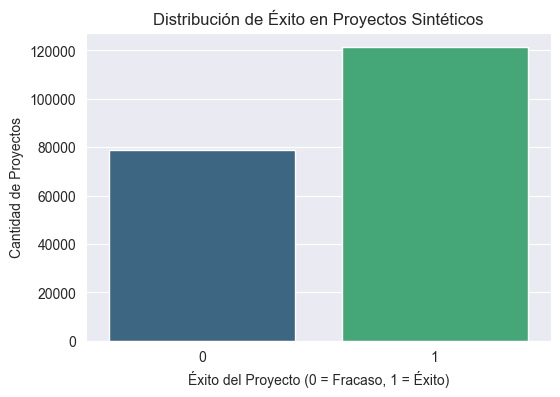

Bloque ejecutado correctamente, puede continuar.


In [10]:
# =============================================================================
# BLOQUE 5: Análisis Exploratorio
# =============================================================================

plt.figure(figsize=(6, 4))
sns.countplot(x="Éxito del Proyecto", data=df, palette="viridis")
plt.title("Distribución de Éxito en Proyectos Sintéticos")
plt.xlabel("Éxito del Proyecto (0 = Fracaso, 1 = Éxito)")
plt.ylabel("Cantidad de Proyectos")
plt.show()

print("Bloque ejecutado correctamente, puede continuar.")


In [11]:
# =============================================================================
# BLOQUE 6: Entrenamiento del Modelo Predictivo con Barra de Progreso
# =============================================================================

from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1) Prepara tus datos
X = df.drop(columns=["Éxito del Proyecto"])
y = df["Éxito del Proyecto"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED
)

# 2) Crea el RandomForest con warm_start
modelo = RandomForestClassifier(n_estimators=1, warm_start=True, random_state=42)

# 3) Entrena árbol a árbol mostrando progreso
for i in tqdm(range(700), desc="Entrenando Random Forest", unit="árbol"):
    modelo.n_estimators = i + 1
    modelo.fit(X_train, y_train)

# 4) Evalúa
y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("=========================================================")
print(f"\n Precisión del Modelo Predictivo: {accuracy:.2%}\n")
print("=========================================================")


Entrenando Random Forest:   0%|          | 0/700 [00:00<?, ?árbol/s]


 Precisión del Modelo Predictivo: 94.17%




 Confirmando la Precisión del Modelo Predictivo: 94.17%

---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.91      0.93     15812
           1       0.94      0.96      0.95     24188

    accuracy                           0.94     40000
   macro avg       0.94      0.94      0.94     40000
weighted avg       0.94      0.94      0.94     40000



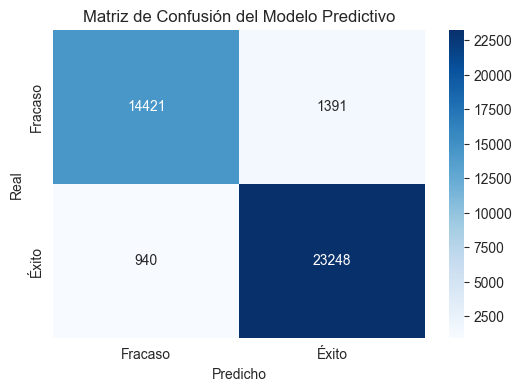

Bloque ejecutado correctamente, puede continuar.


In [12]:
# =============================================================================
# BLOQUE 7: Confirmando la Precisión del Modelo Predictivo
# =============================================================================

print("=========================================================")
print(f"\n Confirmando la Precisión del Modelo Predictivo: {accuracy:.2%}\n")
print("---------------------------------------------------------")
print("=========================================================")
print(classification_report(y_test, y_pred))
print("=========================================================")

# Mostrar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d",
            xticklabels=["Fracaso", "Éxito"], yticklabels=["Fracaso", "Éxito"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión del Modelo Predictivo")
plt.show()

print("Bloque ejecutado correctamente, puede continuar.")

---

# Pasaremos a crear la Red bayesiana

---

In [13]:
# ====================================================================
# BLOQUE 8: CONFIGURACIÓN GLOBAL
# ====================================================================
# Para controlar el tamaño del entrenamiento bayesiano y la discretización:
#
# SAMPLE_SIZE:
#   • None  → usa todas las filas de train_df (sin muestreo).
#   • Entero → si ≤ len(train_df), toma ese número de filas SIN reemplazo.
#               si > len(train_df), toma ese número de filas CON reemplazo
#               (se repetirán ejemplos) para ver hasta qué límite aguanta tu hardware.
#
# BIN_COUNT:
#   • Número de “cajitas” o intervalos uniformes en los que cortamos cada
#     variable numérica antes de alimentar la red bayesiana.
#   • Por ejemplo, BIN_COUNT = 10 divide cada rango en 10 trozos iguales,
#     convirtiendo cada valor original en un entero de 1 a 10 según el trozo.
#
# Ajusta estos dos valores según la memoria/CPU disponible y el detalle
# de discretización que necesites.
SAMPLE_SIZE = 7_000_000   # Máx. filas a usar para entrenar la red bayesiana (None = todas), recomendado 42000.
BIN_COUNT   = 20           # Número de intervalos iguales para discretizar cada variable, recomendado 5.

print("Bloque ejecutado correctamente, puede continuar.")


Bloque ejecutado correctamente, puede continuar.


In [14]:
# =============================================================================
# BLOQUE 9: Manipulación de datos
# =============================================================================

# Manipulación de datos
import pandas as pd
import numpy as np

# División y modelos de sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Redes bayesianas con pgmpy
from pgmpy.estimators import HillClimbSearch, BayesianEstimator
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de semilla
np.random.seed(RANDOM_SEED)

# Cargar el CSV ya preparado (en caso de probar uno propio)
# df = pd.read_csv("dataset_proyectos_balanceado.csv")

# Aprovechamos el DataFrame preprocesado en memoria
df = df.copy()

print("=========================================================")
print("Datos cargados:", df.shape)
print("=========================================================")

print("Bloque ejecutado correctamente, puede continuar.")

Datos cargados: (200000, 16)
Bloque ejecutado correctamente, puede continuar.


In [15]:
# =========================================
# BLOQUE 10: División train / test
# =========================================

from sklearn.model_selection import train_test_split

# Usamos RANDOM_STATE de la configuración global
train_df, test_df = train_test_split(
    df,
    test_size= 0.20,
    random_state= RANDOM_SEED
)

print("=========================================================")
print(f"Datos de entrenamiento: {train_df.shape}")
print(f"Datos de prueba      : {test_df.shape}")
print("=========================================================")

print("Bloque ejecutado correctamente, puede continuar.")


Datos de entrenamiento: (160000, 16)
Datos de prueba      : (40000, 16)
Bloque ejecutado correctamente, puede continuar.


In [16]:
# =========================================
# BLOQUE 11: Sub–sample controlado + Discretización rápida
#   - Si SAMPLE_SIZE es None → usa todo train_df
#   - Si SAMPLE_SIZE ≤ total_train → muestrea sin reemplazo
#   - Si SAMPLE_SIZE > total_train → muestrea con reemplazo
# =========================================

import numpy as np

# 1) Definir target y features
target   = train_df.columns[-1]
features = [c for c in train_df.columns if c != target]

# 2) Saber cuántas filas hay en train_df
total_train = len(train_df)
print(f"> Total de filas en train_df: {total_train}")

# 3) Decidir cómo muestrear
if SAMPLE_SIZE is None:
    # usar todo
    train_small = train_df.copy()
    used_size   = total_train
    replace     = False
elif SAMPLE_SIZE <= total_train:
    # muestreo sin reemplazo
    train_small = train_df.sample(
        n=SAMPLE_SIZE,
        replace=False,
        random_state=RANDOM_SEED
    ).reset_index(drop=True)
    used_size   = SAMPLE_SIZE
    replace     = False
else:
    # muestreo con reemplazo para alcanzar SAMPLE_SIZE
    train_small = train_df.sample(
        n=SAMPLE_SIZE,
        replace=True,
        random_state=RANDOM_SEED
    ).reset_index(drop=True)
    used_size   = SAMPLE_SIZE
    replace     = True

print(f"> Usando {used_size} filas "
      f"({'con' if replace else 'sin'} reemplazo) "
      "para entrenar la red bayesiana")

# 4) Calcular cortes uniformes en BIN_COUNT intervalos
bin_edges = {}
for col in features:
    lo, hi = train_small[col].min(), train_small[col].max()
    bin_edges[col] = np.linspace(lo, hi, BIN_COUNT + 1)

# 5) Discretizar train_small con np.digitize
disc_train = train_small.copy()
for col in features:
    disc_train[col] = np.digitize(
        train_small[col],
        bin_edges[col][1:-1]
    )

# 6) Discretizar test_df con los mismos cortes
disc_test = test_df.copy()
for col in features:
    disc_test[col] = np.digitize(
        test_df[col],
        bin_edges[col][1:-1]
    )

print(" ")
print("=========================================================")
print(f"> Total de datos sinteticos utilizados al principio. ")
print(f" variable global NUMERO_DE_PROYECTOS: {NUMERO_DE_PROYECTOS}")
print("---------------------------------------------------------")
print(f"> disc_train shape: {disc_train.shape}")
print(f"> disc_test  shape: {disc_test.shape}")
print("=========================================================")
print(" ")

print("Bloque ejecutado correctamente, puede continuar.")


> Total de filas en train_df: 160000
> Usando 7000000 filas (con reemplazo) para entrenar la red bayesiana
 
> Total de datos sinteticos utilizados al principio. 
 variable global NUMERO_DE_PROYECTOS: 200000
---------------------------------------------------------
> disc_train shape: (7000000, 16)
> disc_test  shape: (40000, 16)
 
Bloque ejecutado correctamente, puede continuar.


In [17]:
# =========================================
# BLOQUE 12: Aprendizaje Naive Bayes discreto (target → features)
# =========================================

from pgmpy.models     import DiscreteBayesianNetwork
from pgmpy.estimators import BayesianEstimator

# 1) Reuso de `disc_train`, `features` y `target`
#    Asegúrate de tener esto definido tras el Bloque 3A:
#    target   = train_df.columns[-1]
#    features = [c for c in train_df.columns if c != target]

# 2) Construir estructura Naive Bayes: target → cada feature
estructura = [(target, f) for f in features]

# 3) Ajustar la red bayesiana
model_bn = DiscreteBayesianNetwork(estructura)
model_bn.fit(disc_train, estimator=BayesianEstimator)

# 4) Validar e imprimir aristas
print("=========================================================")
print("¿Modelo válido? ", model_bn.check_model())
print("Aristas (Naive Bayes):")
for u, v in estructura:
    print(f"  • {u} → {v}")
print("=========================================================")

print("Bloque ejecutado correctamente, puede continuar.")

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Complejidad': 'N', 'Presupuesto (USD)': 'N', 'Duración (meses)': 'N', 'Tiempo': 'N', 'Costo': 'N', 'Calidad': 'N', 'Cantidad de Personas': 'N', 'Volatilidad': 'N', 'Incertidumbre': 'N', 'Complejidad VUCA': 'N', 'Ambigüedad': 'N', 'Riesgo VUCA (Global)': 'N', 'Innovación': 'N', 'Adaptabilidad': 'N', 'Impacto': 'N', 'Éxito del Proyecto': 'N'}


¿Modelo válido?  True
Aristas (Naive Bayes):
  • Éxito del Proyecto → Complejidad
  • Éxito del Proyecto → Presupuesto (USD)
  • Éxito del Proyecto → Duración (meses)
  • Éxito del Proyecto → Tiempo
  • Éxito del Proyecto → Costo
  • Éxito del Proyecto → Calidad
  • Éxito del Proyecto → Cantidad de Personas
  • Éxito del Proyecto → Volatilidad
  • Éxito del Proyecto → Incertidumbre
  • Éxito del Proyecto → Complejidad VUCA
  • Éxito del Proyecto → Ambigüedad
  • Éxito del Proyecto → Riesgo VUCA (Global)
  • Éxito del Proyecto → Innovación
  • Éxito del Proyecto → Adaptabilidad
  • Éxito del Proyecto → Impacto
Bloque ejecutado correctamente, puede continuar.


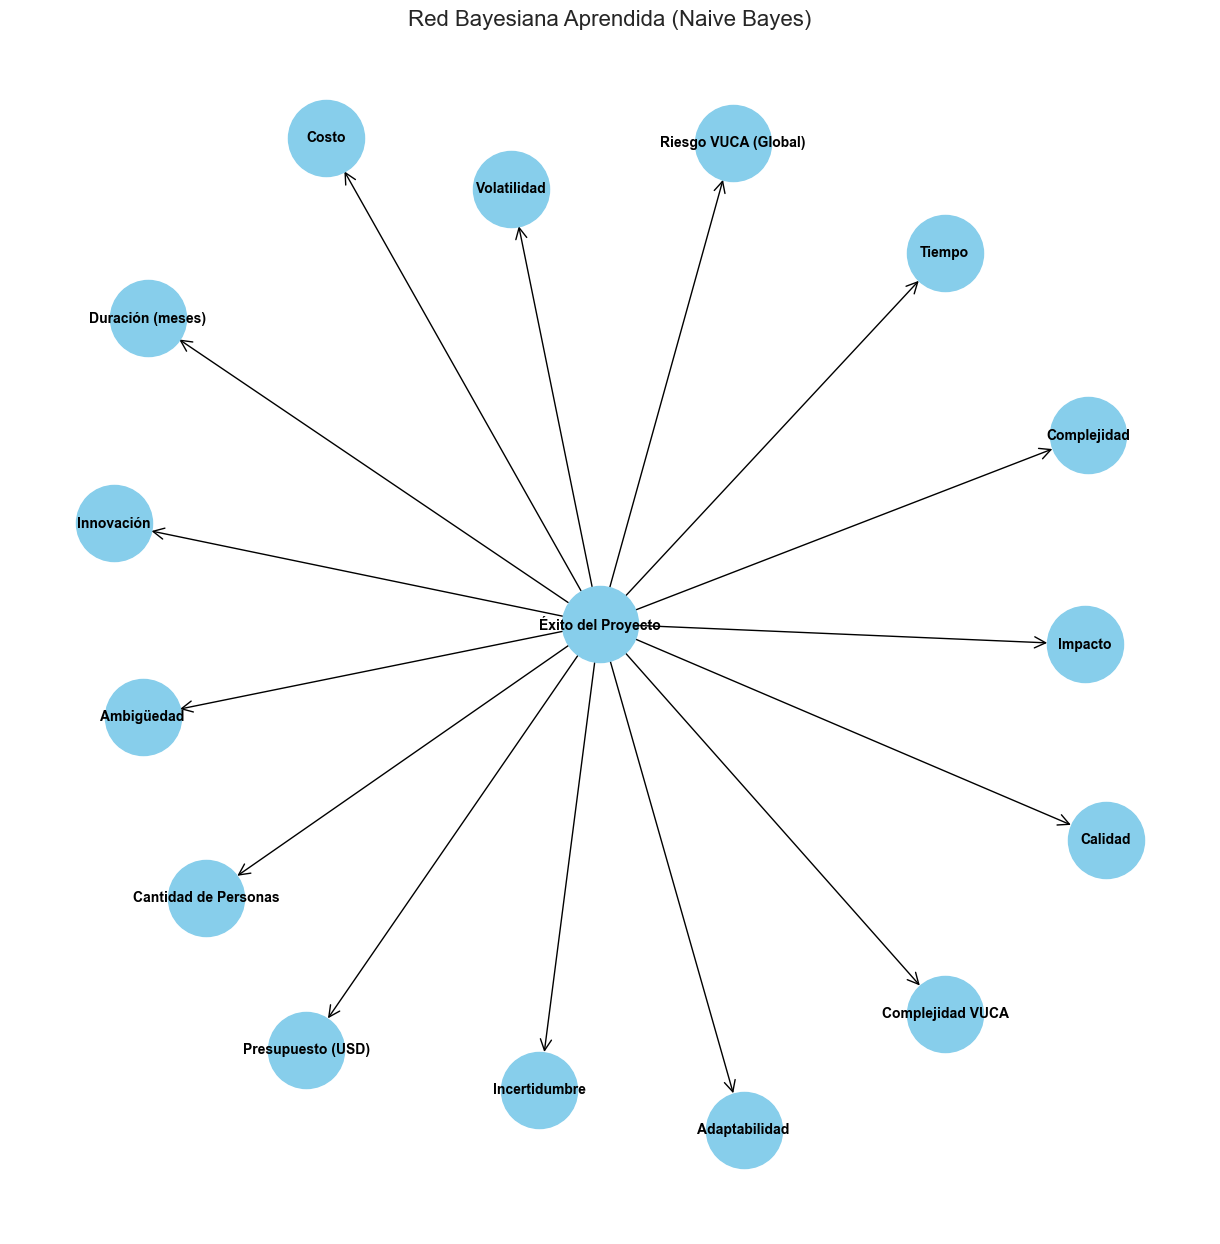

Bloque ejecutado correctamente, puede continuar.


In [18]:
# =========================================
# BLOQUE 13: Visualizar la Red Bayesiana Aprendida
# =========================================

import networkx as nx
import matplotlib.pyplot as plt

# 1) Construir un DiGraph de networkx a partir de las aristas de model_bn
G = nx.DiGraph(model_bn.edges())

# 2) Calcular posiciones de los nodos con un layout agradable
pos = nx.spring_layout(G, seed=RANDOM_SEED)

# 3) Dibujar la red
plt.figure(figsize=(12, 12))
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    arrowsize=20,
    arrowstyle="->"
)
plt.title("Red Bayesiana Aprendida (Naive Bayes)", fontsize=16)
plt.axis("off")
plt.show()

print("Bloque ejecutado correctamente, puede continuar.")

Inferencia Bayesiana: 100%|██████████| 40000/40000 [00:14<00:00, 2755.38fila/s]


Precisión Red Bayesiana: 91.89%

              precision    recall  f1-score   support

           0       0.96      0.83      0.89     15812
           1       0.90      0.98      0.94     24188

    accuracy                           0.92     40000
   macro avg       0.93      0.90      0.91     40000
weighted avg       0.92      0.92      0.92     40000



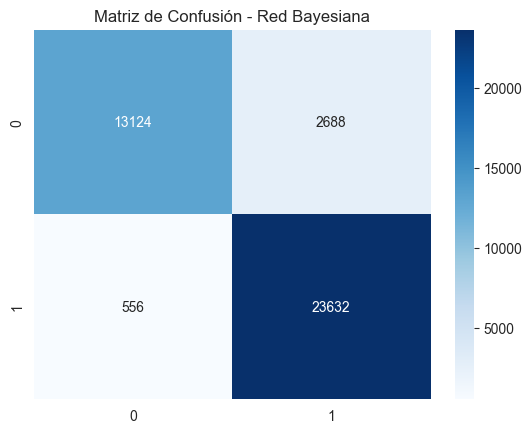

Bloque ejecutado correctamente, puede continuar.


In [19]:
# =========================================
# BLOQUE 14 (con tqdm): Inferencia + Evaluación Bayesiana
# =========================================

from pgmpy.inference import VariableElimination
from sklearn.metrics   import accuracy_score, classification_report, confusion_matrix
from tqdm import tqdm   # pip install tqdm

# 1) Prepara el motor de inferencia
infer = VariableElimination(model_bn)

# 2) Itera sobre disc_test mostrando progreso
preds_bn = []
for _, row in tqdm(
        disc_test.iterrows(),
        total=len(disc_test),
        desc="Inferencia Bayesiana",
        unit="fila"
    ):
    evidencia = {c: row[c] for c in features}
    try:
        q = infer.query(variables=[target], evidence=evidencia)
        preds_bn.append(q.values.argmax())
    except:
        preds_bn.append(None)

# 3) Filtra y calcula métricas como antes
mask      = [p is not None for p in preds_bn]
y_true_bn = disc_test[target].values[mask]
preds_bn  = [p for p in preds_bn if p is not None]

acc_bn = accuracy_score(y_true_bn, preds_bn)
print(f"\nPrecisión Red Bayesiana: {acc_bn:.2%}\n")
print(classification_report(y_true_bn, preds_bn))

cm_bn = confusion_matrix(y_true_bn, preds_bn)
sns.heatmap(cm_bn, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_true_bn),
            yticklabels=np.unique(y_true_bn))
plt.title("Matriz de Confusión - Red Bayesiana")
plt.show()

print("Bloque ejecutado correctamente, puede continuar.")

In [20]:
# =========================================
# BLOQUE 16: Comparación de precisiones
# =========================================

print("=============== Comparación de precisión de modelos ===============")
print(f"(Nuevo) Red Bayesiana : {acc_bn:.2%}")
print(f"(anterior) Random Forest : {accuracy:.2%}")
print("======================================================================")

print("Bloque ejecutado correctamente, puede continuar.")

=============== Comparación de precisión de modelos ===============
(Nuevo) Red Bayesiana : 91.89%
(anterior) Random Forest : 94.17%
Bloque ejecutado correctamente, puede continuar.


In [21]:
# =========================================
# BLOQUE 17: ESTRUCTURE LEARNING + PARAMETER LEARNING
# =========================================

# 1) Importaciones
from pgmpy.estimators import HillClimbSearch, BIC, BayesianEstimator
from pgmpy.models     import DiscreteBayesianNetwork

# 2) Aprendizaje de estructura con HillClimbSearch + BIC
#    (puedes ajustar max_indegree y max_iter según tu hardware)
hc = HillClimbSearch(disc_train)
best_model = hc.estimate(
    scoring_method=BIC(disc_train),
    max_indegree=3,    # cada nodo puede tener hasta 3 padres
    max_iter=500       # número de iteraciones de hill-climbing
    # Si se detiene antes de llegar a 500 iteraciones,
    # es porque no encontró ninguna mejora en la puntuación BIC
)

# 3) Crear la red bayesiana con la estructura aprendida
bn_auto = DiscreteBayesianNetwork(best_model.edges())

# 4) Estimación de parámetros (CPDs) con un estimador bayesiano
bn_auto.fit(
    data=disc_train,
    estimator=BayesianEstimator,
    prior_type='BDeu',            # Dirichlet equivalent uniform prior
    equivalent_sample_size=1     # suavizado con una muestra "virtual" de tamaño 10
)

# Ahora `bn_auto` ya tiene:
#   • `bn_auto.nodes()`      → lista de variables
#   • `bn_auto.edges()`      → la estructura aprendida
#   • `bn_auto.get_cpds()`   → sus tablas de probabilidad condicional

# =========================================
# EJEMPLO: mostrar nodos, aristas y uno de los CPDs
# =========================================
print("Nodos aprendidos:", bn_auto.nodes())
print("Aristas aprendidas:")
for u, v in bn_auto.edges():
    print(f"  {u} → {v}")

print("\nUn CPD de ejemplo:")
print(bn_auto.get_cpds()[0])

print("Estructura y CPDs generados correctamente. ")
print("-------------------------------------------------")

# Nota: Si el proceso se detiene antes de las 500 iteraciones,
# Es buena señal, significa que el algoritmo:
#  1. Ha explorado todas las modificaciones posibles (añadir, quitar o invertir aristas)
#  2. Ha encontrado un modelo cuya puntuación BIC no puede mejorar
# Por tanto, alcanzó un óptimo local y no necesita seguir buscando.

print("Bloque ejecutado correctamente, puede continuar.")

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Complejidad': 'N', 'Presupuesto (USD)': 'N', 'Duración (meses)': 'N', 'Tiempo': 'N', 'Costo': 'N', 'Calidad': 'N', 'Cantidad de Personas': 'N', 'Volatilidad': 'N', 'Incertidumbre': 'N', 'Complejidad VUCA': 'N', 'Ambigüedad': 'N', 'Riesgo VUCA (Global)': 'N', 'Innovación': 'N', 'Adaptabilidad': 'N', 'Impacto': 'N', 'Éxito del Proyecto': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Complejidad': 'N', 'Presupuesto (USD)': 'N', 'Duración (meses)': 'N', 'Tiempo': 'N', 'Costo': 'N', 'Calidad': 'N', 'Cantidad de Personas': 'N', 'Volatilidad': 'N', 'Incertidumbre': 'N', 'Complejidad VUCA': 'N', 'Ambigüedad': 'N', 'Riesgo VUCA (Global)': 'N', 'Innovación': 'N', 'Adaptabilidad': 'N', 'Impacto': 'N', 'Éxito del Proyecto': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from dat

  0%|          | 0/500 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Complejidad': 'N', 'Presupuesto (USD)': 'N', 'Duración (meses)': 'N', 'Tiempo': 'N', 'Costo': 'N', 'Calidad': 'N', 'Cantidad de Personas': 'N', 'Volatilidad': 'N', 'Incertidumbre': 'N', 'Complejidad VUCA': 'N', 'Ambigüedad': 'N', 'Riesgo VUCA (Global)': 'N', 'Innovación': 'N', 'Adaptabilidad': 'N', 'Impacto': 'N', 'Éxito del Proyecto': 'N'}


Nodos aprendidos: ['Presupuesto (USD)', 'Innovación', 'Ambigüedad', 'Calidad', 'Impacto', 'Volatilidad', 'Duración (meses)', 'Éxito del Proyecto', 'Adaptabilidad', 'Complejidad', 'Cantidad de Personas', 'Tiempo', 'Costo', 'Complejidad VUCA', 'Incertidumbre', 'Riesgo VUCA (Global)']
Aristas aprendidas:
  Presupuesto (USD) → Innovación
  Presupuesto (USD) → Ambigüedad
  Presupuesto (USD) → Calidad
  Presupuesto (USD) → Impacto
  Presupuesto (USD) → Volatilidad
  Ambigüedad → Complejidad VUCA
  Ambigüedad → Incertidumbre
  Ambigüedad → Volatilidad
  Volatilidad → Complejidad VUCA
  Volatilidad → Incertidumbre
  Duración (meses) → Éxito del Proyecto
  Duración (meses) → Adaptabilidad
  Duración (meses) → Complejidad
  Duración (meses) → Cantidad de Personas
  Éxito del Proyecto → Adaptabilidad
  Éxito del Proyecto → Complejidad
  Éxito del Proyecto → Innovación
  Éxito del Proyecto → Presupuesto (USD)
  Éxito del Proyecto → Cantidad de Personas
  Éxito del Proyecto → Impacto
  Éxito del Pr


Resumen:
  > Nodos       : 16
  > CPDs totales: 16
  > CPDs únicas : 16
  > Red válida? : True


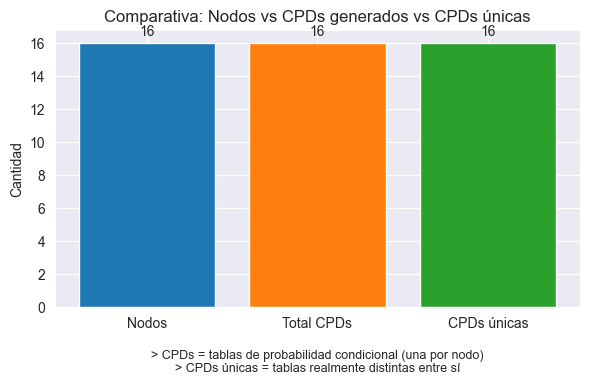

Bloque ejecutado correctamente, puede continuar.


In [22]:
# ============================
# BLOQUE 18: Gráfico: Nodos vs CPDs vs CPDs únicas
# ============================
import matplotlib.pyplot as plt

# 1) Cálculo de cantidades
num_nodos  = len(bn_auto.nodes())
cpds       = bn_auto.get_cpds()
num_cpds   = len(cpds)
num_unicos = len({ str(cpd) for cpd in cpds })

# 2) Imprimir resumen
print(f"\nResumen:")
print(f"  > Nodos       : {num_nodos}")
print(f"  > CPDs totales: {num_cpds}")
print(f"  > CPDs únicas : {num_unicos}")
print(f"  > Red válida? : {bn_auto.check_model()}")

# 3) Dibujar el bar chart
labels = ['Nodos', 'Total CPDs', 'CPDs únicas']
values = [num_nodos, num_cpds, num_unicos]
colors = ['C0', 'C1', 'C2']

fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(labels, values, color=colors)

# Anotar valores
for bar in bars:
    h = bar.get_height()
    ax.annotate(f'{h}',
                xy=(bar.get_x() + bar.get_width()/2, h),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

ax.set_ylabel("Cantidad")
ax.set_title("Comparativa: Nodos vs CPDs generados vs CPDs únicas")
ax.text(0.5, -0.15,
        "> CPDs = tablas de probabilidad condicional (una por nodo)\n"
        "> CPDs únicas = tablas realmente distintas entre sí",
        ha='center', va='top', transform=ax.transAxes, fontsize=9)

plt.tight_layout()
plt.show()

print("Bloque ejecutado correctamente, puede continuar.")

In [23]:
# =========================================
# BLOQUE 19: Comparación de precisiones
# =========================================

print("=============== EN RESUMEN ===============")
print(f"(Nuevo) Red Bayesiana : {acc_bn:.2%}")
print(f"(anterior) Random Forest : {accuracy:.2%}")
print("======================================================================")

print("Bloque ejecutado correctamente, puede continuar.")

=============== EN RESUMEN ===============
(Nuevo) Red Bayesiana : 91.89%
(anterior) Random Forest : 94.17%
Bloque ejecutado correctamente, puede continuar.


In [24]:
# =========================================
# BLOQUE 20 - FINAL: Informe de tiempo y uso de recursos
# =========================================

import time, os
import psutil
import shutil

# Tiempo transcurrido
elapsed = time.time() - _start_time
mins, secs = divmod(elapsed, 60)
print(f"\n=== INFORME DE EJECUCIÓN ===")
print(f"- Tiempo total: {int(mins)} min {int(secs)} s")

# Memoria usada por este proceso
proc = psutil.Process(os.getpid())
rss_gb = proc.memory_info().rss / 1024**3
print(f"- RAM usada (resident set): {rss_gb:.2f} GB")

# Espacio en disco tras la ejecución
du2 = shutil.disk_usage(os.getcwd())
free_disk2 = du2.free / 1024**3
print(f"- Espacio libre en disco (post-run): {free_disk2:.1f} GB")

# GPU (si aplica)
try:
    import torch
    if torch.cuda.is_available():
        alloc = torch.cuda.memory_allocated(0) / 1024**3
        resv  = torch.cuda.memory_reserved(0)  / 1024**3
        print(f"- GPU memoria usada: {alloc:.2f} GB, reservada: {resv:.2f} GB")
except ImportError:
    pass

print("=============================")

print("Bloque ejecutado correctamente, puede continuar.")


=== INFORME DE EJECUCIÓN ===
- Tiempo total: 3 min 56 s
- RAM usada (resident set): 4.13 GB
- Espacio libre en disco (post-run): 862.1 GB
Bloque ejecutado correctamente, puede continuar.
